In [139]:
import numpy as np
import gurobipy as gp
import pandas as pd
import calendar

In [76]:
# Reading the ROI_data csv file
df = pd.read_csv('ROI_data.csv')

In [77]:
# Creating objective vectors
firm1_ROI = np.array(df.iloc[0,1:]) 
firm2_ROI = np.array(df.iloc[1,1:]) 
firm1_ROI

array([0.031, 0.049, 0.024, 0.039, 0.016, 0.024, 0.046, 0.026, 0.033,
       0.044], dtype=object)

# Question 3
Formulate the marketing budget allocation problem as a linear program and find the optimal budget allocation. 

In [78]:
A = np.zeros((13,10)) # initialize constraint matrix
# P, Tv, Seo, AW, F, L, I, Sn, T, E
A[0,:] = [1,1,0,0,-1,0,0,0,0,-1] 
A[1,:] = [0,0,-2,-2,1,1,1,1,1,0] 
A[2,:] = [1,0,0,0,0,0,0,0,0,0] 
A[3,:] = [0,1,0,0,0,0,0,0,0,0] 
A[4,:] = [0,0,1,0,0,0,0,0,0,0] 
A[5,:] = [0,0,0,1,0,0,0,0,0,0] 
A[6,:] = [0,0,0,0,1,0,0,0,0,0] 
A[7,:] = [0,0,0,0,0,1,0,0,0,0] 
A[8,:] = [0,0,0,0,0,0,1,0,0,0] 
A[9,:] = [0,0,0,0,0,0,0,1,0,0] 
A[10,:] = [0,0,0,0,0,0,0,0,1,0] 
A[11,:] = [0,0,0,0,0,0,0,0,0,1] 
A[12,:] = [1,1,1,1,1,1,1,1,1,1]
b = np.array([0,0,3,3,3,3,3,3,3,3,3,3,10]) # limits
sense = np.array(['<','>','<','<','<','<','<','<','<','<','<','<','<']) # all constraints

In [79]:
print(A)

[[ 1.  1.  0.  0. -1.  0.  0.  0.  0. -1.]
 [ 0.  0. -2. -2.  1.  1.  1.  1.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


In [80]:
ojModel = gp.Model() # initialize an empty model

ojModX = ojModel.addMVar(10) # tell the model how many variables there are
ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) # add the constraints to the model
ojModel.setMObjective(None,firm1_ROI,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model

ojModel.Params.OutputFlag = 0

In [81]:
ojModel.optimize() # solve the LP

In [82]:
ojModel.objVal # optimal budget allocation level in million

0.45600000000000007

In [83]:
ojModX.x 

array([0., 3., 0., 1., 0., 0., 3., 0., 0., 3.])

# Question 4
Compare the two optimal budget allocations from the two ROI estimates

In [84]:
ojModel1 = gp.Model() # initialize an empty model

ojModX1 = ojModel1.addMVar(10) # tell the model how many variables there are
ojModCon1 = ojModel1.addMConstrs(A, ojModX1, sense, b) # add the constraints to the model
ojModel1.setMObjective(None,firm2_ROI,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model

ojModel1.Params.OutputFlag = 0

In [85]:
ojModel1.optimize() # solve the LP

In [86]:
ojModel1.objVal # optimal budget allocation level in million

0.45600000000000007

In [87]:
ojModX1.x 

array([3., 0., 0., 1., 3., 3., 0., 0., 0., 0.])

**Comparing the two models**

The overall optimal ROI from the budget allocation from both models is the same.

However the allocations are different.

The allocations are : 

MODEL Print  TV      SEO    AdWords Facebook LinkedIn Instagram Snapchat Twitter Email
 1.     0     3       0        1         0        0        3        0        0      3
 2.     3     0       0        1         3        3        0        0        0      0

# Question 5

Part 1 - Assuming the first ROI is correct using the second ROI data

In [88]:
X = np.zeros((10,10))
# P, Tv, Seo, AW, F, L, I, Sn, T, E
X[0,:] = [3,0,0,0,0,0,0,0,0,0] 
X[1,:] = [0,0,0,0,0,0,0,0,0,0] 
X[2,:] = [0,0,0,0,0,0,0,0,0,0] 
X[3,:] = [0,0,0,1,0,0,0,0,0,0] 
X[4,:] = [0,0,0,0,3,0,0,0,0,0] 
X[5,:] = [0,0,0,0,0,3,0,0,0,0] 
X[6,:] = [0,0,0,0,0,0,0,0,0,0] 
X[7,:] = [0,0,0,0,0,0,0,0,0,0] 
X[8,:] = [0,0,0,0,0,0,0,0,0,0] 
X[9,:] = [0,0,0,0,0,0,0,0,0,0]
return1 = np.sum(X*firm1_ROI)
print(return1)

0.252


In [89]:
# Difference in returns
diff_1 = ojModel.objVal - return1
print('The returns decreases by '+ str(round(diff_1*100,2)) +'% if the first model correct and use the second model\'s data.')

The returns decreases by 20.4% if the first model correct and use the second model's data.


Part 2 - Assuming the second ROI is correct using the first ROI data

In [90]:
Y = np.zeros((10,10))
# P, Tv, Seo, AW, F, L, I, Sn, T, E
Y[0,:] = [0,0,0,0,0,0,0,0,0,0] 
Y[1,:] = [0,3,0,0,0,0,0,0,0,0] 
Y[2,:] = [0,0,0,0,0,0,0,0,0,0] 
Y[3,:] = [0,0,0,1,0,0,0,0,0,0] 
Y[4,:] = [0,0,0,0,0,0,0,0,0,0] 
Y[5,:] = [0,0,0,0,0,0,0,0,0,0] 
Y[6,:] = [0,0,0,0,0,0,3,0,0,0] 
Y[7,:] = [0,0,0,0,0,0,0,0,0,0] 
Y[8,:] = [0,0,0,0,0,0,0,0,0,0] 
Y[9,:] = [0,0,0,0,0,0,0,0,0,3]
return2 = np.sum(Y*firm2_ROI)
print(return2)

0.264


In [91]:
# Difference in returns
diff_2 = ojModel1.objVal - return2
print('The returns decreases by '+ str(round(diff_2*100,2)) +'% if the second model correct and use the first model\'s data.')

The returns decreases by 19.2% if the second model correct and use the first model's data.


**Validating the usefulness of the third constraint**
Amount invested for each platform is not more than $3M

In [92]:
Z = np.zeros((3,10))               # initialize constraint matrix
# P, Tv, Seo, AW, F, L, I, Sn, T, E
Z[0,:] =  [1,1,1,1,1,1,1,1,1,1]                         
Z[1,:] =  [1,1,0,0,-1,0,0,0,0,-1]                         
Z[2,:] =  [0,0,-2,-2,1,1,1,1,1,0]  
b1 = np.array([10,0,0])        
sense = np.array(['<','<','>']) 
print(Z)

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  0.  0. -1.  0.  0.  0.  0. -1.]
 [ 0.  0. -2. -2.  1.  1.  1.  1.  1.  0.]]


In [93]:
ojModel2 = gp.Model() # initialize an empty model

ojModX2 = ojModel2.addMVar(10) # tell the model how many variables there are
ojModCon2 = ojModel2.addMConstrs(Z, ojModX2, sense, b1) # add the constraints to the model
ojModel2.setMObjective(None,firm1_ROI,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model

ojModel2.Params.OutputFlag = 0

In [94]:
ojModel2.optimize() # solve the LP
ojModel2.objVal # optimal budget allocation level

0.46499999999999997

In [95]:
ojModX2.x 

array([0., 5., 0., 0., 0., 0., 0., 0., 0., 5.])

In [96]:
ojModel2.setMObjective(None,firm2_ROI,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model

ojModel2.Params.OutputFlag = 0
ojModel2.optimize() # solve the LP
ojModel2.objVal

0.46499999999999997

In [97]:
ojModX2.x 

array([5., 0., 0., 0., 5., 0., 0., 0., 0., 0.])

Running both the models without the third constraint, we see that it does affect our optimal level of budget allocation. The optimal level of budget changes from $0.456 million to $0.465 million as we remove/don't consider the third constraint. Further, the budget allocation to some of the channels become $ 5 million. 

# Question 6

In [70]:
A = np.zeros((13,10))               # initialize constraint matrix
A[0,:] = [1,1,0,0,-1,0,0,0,0,-1] 
A[1,:] = [0,0,-2,-2,1,1,1,1,1,0] 
A[2,:] = [1,0,0,0,0,0,0,0,0,0] 
A[3,:] = [0,1,0,0,0,0,0,0,0,0] 
A[4,:] = [0,0,1,0,0,0,0,0,0,0] 
A[5,:] = [0,0,0,1,0,0,0,0,0,0] 
A[6,:] = [0,0,0,0,1,0,0,0,0,0] 
A[7,:] = [0,0,0,0,0,1,0,0,0,0] 
A[8,:] = [0,0,0,0,0,0,1,0,0,0] 
A[9,:] = [0,0,0,0,0,0,0,1,0,0] 
A[10,:] = [0,0,0,0,0,0,0,0,1,0] 
A[11,:] = [0,0,0,0,0,0,0,0,0,1] 
A[12,:] = [1,1,1,1,1,1,1,1,1,1]
b = np.array([0,0,3,3,3,3,3,3,3,3,3,3,10]) # limits
sense = np.array(['<','>','<','<','<','<','<','<','<','<','<','<','<']) # all constraints
ojModel = gp.Model()                                    # initialize an empty model
ojModX = ojModel.addMVar(10)                            # tell the model how many variables there are
ojModCon = ojModel.addMConstrs(A, ojModX, sense, b)     # add the constraints to the model
ojModel.setMObjective(None,firm1_ROI,0,sense=gp.GRB.MAXIMIZE)   # add the objective to the model
ojModel.Params.OutputFlag = 0 
ojModel.optimize()

ojModX.x

array([0., 3., 0., 1., 0., 0., 3., 0., 0., 3.])

In [100]:
df_bounds = pd.DataFrame(ojModX.SAObjLow, columns = ['ROI_limit_lower'],index=df.columns[1:])
df_bounds['ROI_limit_upper'] = ojModX.SAObjUp

In [101]:
df_bounds

,ROI_limit_lower,ROI_limit_upper
Print,-inf,0.049
TV,0.039,0.062
SEO,-inf,0.039
AdWords,0.033,0.046
Facebook,-inf,0.029
LinkedIn,-inf,0.039
Instagram,0.039,inf
Snapchat,-inf,0.039
Twitter,-inf,0.039
Email,0.029,inf


# Question 7

In [165]:
# Reading in the new monthly ROI data from the roi_mat file
df_1 = pd.read_csv('roi_mat.csv')

type(df_1)
df_roi = (df_1.iloc[0:,1:]/100).set_index(df_1.iloc[0:,0])
df_roi


,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Unnamed: 0,,,,,,,,,,
January,0.040,0.036,0.024,0.039,0.030,0.035,0.036,0.0225,0.035,0.035
February,0.040,0.039,0.027,0.038,0.043,0.032,0.027,0.0180,0.037,0.035
March,0.035,0.029,0.031,0.038,0.024,0.041,0.037,0.0260,0.042,0.025
April,0.038,0.031,0.024,0.044,0.024,0.038,0.037,0.0250,0.036,0.029
May,0.035,0.032,0.019,0.034,0.027,0.027,0.039,0.0220,0.045,0.039
June,0.040,0.032,0.027,0.034,0.034,0.030,0.045,0.0210,0.038,0.041
July,0.039,0.036,0.020,0.044,0.039,0.037,0.043,0.0180,0.040,0.038
August,0.042,0.033,0.028,0.042,0.020,0.037,0.036,0.0150,0.044,0.043
September,0.041,0.028,0.025,0.042,0.029,0.037,0.028,0.0250,0.040,0.034


In [166]:
A = np.zeros((13,10))               # initialize constraint matrix
A[0,:] = [1,1,0,0,-1,0,0,0,0,-1] 
A[1,:] = [0,0,-2,-2,1,1,1,1,1,0] 
A[2,:] = [1,0,0,0,0,0,0,0,0,0] 
A[3,:] = [0,1,0,0,0,0,0,0,0,0] 
A[4,:] = [0,0,1,0,0,0,0,0,0,0] 
A[5,:] = [0,0,0,1,0,0,0,0,0,0] 
A[6,:] = [0,0,0,0,1,0,0,0,0,0] 
A[7,:] = [0,0,0,0,0,1,0,0,0,0] 
A[8,:] = [0,0,0,0,0,0,1,0,0,0] 
A[9,:] = [0,0,0,0,0,0,0,1,0,0] 
A[10,:] = [0,0,0,0,0,0,0,0,1,0] 
A[11,:] = [0,0,0,0,0,0,0,0,0,1] 
A[12,:] = [1,1,1,1,1,1,1,1,1,1]

sense = np.array(['<','>','<','<','<','<','<','<','<','<','<','<','<']) # all constraints


### Creating loop for the objective to take ROI given in the csv file

In [167]:
channel = list(list(df.columns)[1:])
df_itr = []
new_budget_list = []
old_budget_list = []
new_allocations = []

# Setting up the base budget
budget = 10

for i in range(12):
    
    b = np.array([0,0,3,3,3,3,3,3,3,3,3,3,budget]) # limits
    
    objModel = gp.Model()                                    # initialize an empty model
    objModX = objModel.addMVar(10)                            # tell the model how many variables there are
    objModCon = objModel.addMConstrs(A, objModX, sense, b) 
    obj_itr = df_roi.iloc[i].array
    objModel.setMObjective(None,firm1_ROI,0,sense=gp.GRB.MAXIMIZE)   # add the objective to the model
    objModel.Params.OutputFlag = 0 
    objModel.optimize()
    return2 = np.sum(objModX.x*obj_itr)
    df_itr.append(return2)
    
    new_allocations.append(objModX.x)
    
    old_budget_list.append(budget)
    budget = budget+return2*0.5
    new_budget_list.append(budget)
    

In [170]:
# Reading in the names of each month to set as an index
months=[]
for i in range(1,13):
    months.append(calendar.month_name[i])
# Assigning the New return, budget and allocation data into a DataFrame
df2 = pd.DataFrame(new_allocations,index=months, columns = channel)
df2['Old Budget'] = old_budget_list
df2['New Budget'] = new_budget_list
df2['Return'] = df_itr

In [171]:
df2

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,Old Budget,New Budget,Return
January,0.0,3.0,0.0,1.000000,0.0,0.0,3.0,0.0,0.000000,3.0,10.000000,10.180000,0.360000
February,0.0,3.0,0.0,1.180000,0.0,0.0,3.0,0.0,0.000000,3.0,10.180000,10.353920,0.347840
March,0.0,3.0,0.0,1.353920,0.0,0.0,3.0,0.0,0.000000,3.0,10.353920,10.516144,0.324449
April,0.0,3.0,0.0,1.505381,0.0,0.0,3.0,0.0,0.010763,3.0,10.516144,10.694957,0.357624
May,0.0,3.0,0.0,1.564986,0.0,0.0,3.0,0.0,0.129971,3.0,10.694957,10.889486,0.389058
June,0.0,3.0,0.0,1.629829,0.0,0.0,3.0,0.0,0.259657,3.0,10.889486,11.099126,0.419281
July,0.0,3.0,0.0,1.699709,0.0,0.0,3.0,0.0,0.399418,3.0,11.099126,11.320008,0.441764
August,0.0,3.0,0.0,1.773336,0.0,0.0,3.0,0.0,0.546672,3.0,11.320008,11.537275,0.434534
September,0.0,3.0,0.0,1.845758,0.0,0.0,3.0,0.0,0.691517,3.0,11.537275,11.724866,0.375183
October,0.0,3.0,0.0,1.908289,0.0,0.0,3.0,0.0,0.816578,3.0,11.724866,11.919964,0.390196


### Chart for demonstrating returns 

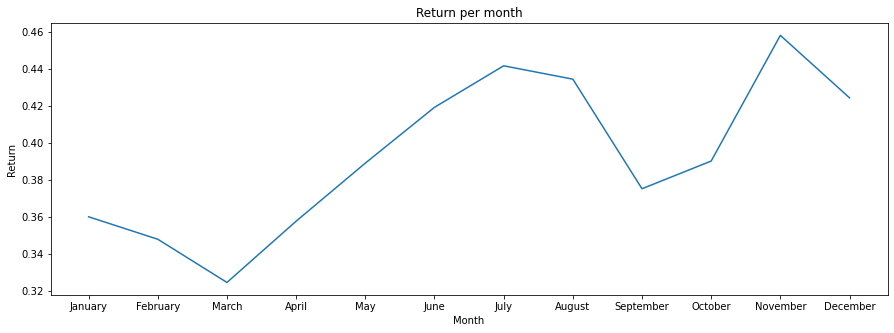

In [178]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 5))
plt.plot(months,df_itr)
plt.title('Return per month')
plt.xlabel('Month')
plt.ylabel('Return')
plt.show()

### Chart for demonstrating new budget allocation

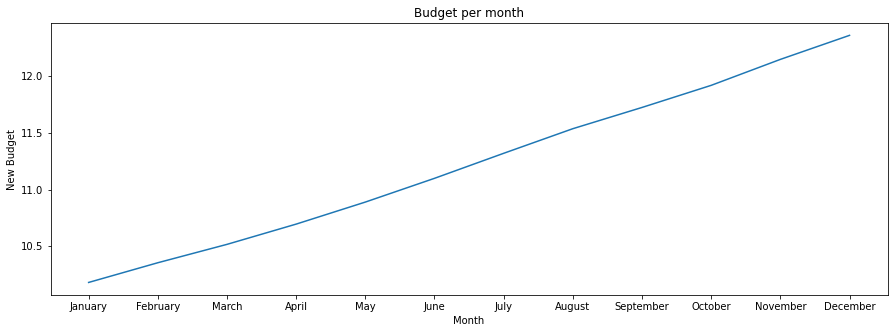

In [181]:
fig = plt.figure(figsize=(15, 5))
plt.plot(months,new_budget_list)
plt.title('Budget per month')
plt.xlabel('Month')
plt.ylabel('New Budget')
plt.show()

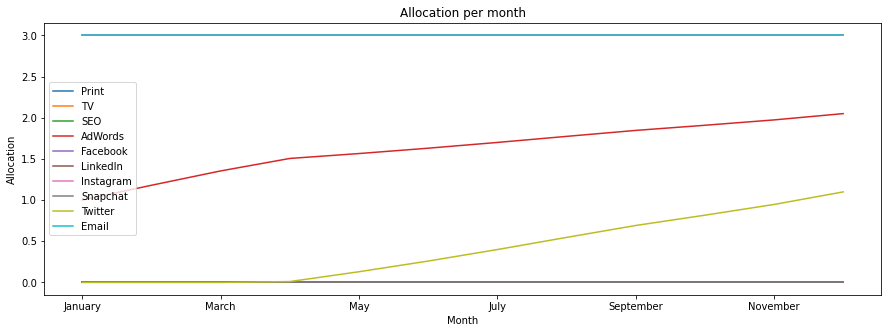

In [200]:
df_na = df2.iloc[0:,:10]
ax = plt.gca()
df_na.plot(kind='line',ax=ax,figsize=(15, 5))
plt.title('Allocation per month')
plt.xlabel('Month')
plt.ylabel('Allocation')
plt.show()

# Question 8

In [203]:
df3 = df2.iloc[:,:10]
monthly_change = []
for i in range(len(months)-1):
    monthly_change.append(months[i]+'-'+months[i+1])
df_stability = pd.DataFrame(index=monthly_change,columns=df3.columns)

# Checking for stability

Stability = []
ROI_Change = {}
for i in range(len(months)-1):
    for j in range(10):
        k = abs(df3.loc[months[i+1]][j] - df3.loc[months[i]][j])
        if k > 1:
            Stability.append('Unstable')
            df_stability.iloc[i][j] = 'Unstable'
        else:
            Stability.append('Stable')
            df_stability.iloc[i][j] = 'Stable'

In [204]:
df_stability

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
January-February,Stable,Stable,Stable,Stable,Stable,Stable,Stable,Stable,Stable,Stable
February-March,Stable,Stable,Stable,Stable,Stable,Stable,Stable,Stable,Stable,Stable
March-April,Stable,Stable,Stable,Stable,Stable,Stable,Stable,Stable,Stable,Stable
April-May,Stable,Stable,Stable,Stable,Stable,Stable,Stable,Stable,Stable,Stable
May-June,Stable,Stable,Stable,Stable,Stable,Stable,Stable,Stable,Stable,Stable
June-July,Stable,Stable,Stable,Stable,Stable,Stable,Stable,Stable,Stable,Stable
July-August,Stable,Stable,Stable,Stable,Stable,Stable,Stable,Stable,Stable,Stable
August-September,Stable,Stable,Stable,Stable,Stable,Stable,Stable,Stable,Stable,Stable
September-October,Stable,Stable,Stable,Stable,Stable,Stable,Stable,Stable,Stable,Stable
October-November,Stable,Stable,Stable,Stable,Stable,Stable,Stable,Stable,Stable,Stable


The table above suggests that the monthly change in ROI across channels is stable for all months. This is true as also demonstrated by the table shown in Question 7. Here, we can see that the monthly change in allocation for none of the channels exceed more than $1 million. And hence it is a stable budget across all months for all channels.